In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader as pdr
print(pdr.__version__)

0.4.1


In [3]:
def cal_portfolio_performance(close_s, periods=250):
    daily_return = close_s.pct_change()
    mean = daily_return.mean()
    std = daily_return.std(ddof=0)
    cum_return = close_s[-1] / close_s[0] - 1
    sharpe = mean / std * np.sqrt(periods)
    return mean, std, sharpe, cum_return

def simulate(start, end, symbols, allocations):
    assert len(symbols) == len(allocations)
    quote_panel = pdr.get_data_yahoo(symbols, start=start, end=end)
    quotes = quote_panel.to_frame()
    quotes = quotes['Adj Close'].unstack()[symbols].sort_index()
    
    pct_changes = quotes.pct_change().fillna(0)
    normalized_quote = (pct_changes + 1).cumprod()
    portfolio_quote = normalized_quote * allocations
    portfolio_quote = portfolio_quote.sum(axis=1)
    return cal_portfolio_performance(portfolio_quote)

simulate("20110101", "20111231", ['AAPL', 'GLD', 'GOOG', 'XOM'], [0.4, 0.4, 0.0, 0.2])

(0.00065991796194185169,
 0.010167048815645972,
 1.0262780608376447,
 0.16488308056504186)

In [24]:
quote_panel = pdr.get_data_yahoo(['AAPL', 'GLD', 'GOOG', 'XOM'], start="20160501")
quotes = quote_panel.to_frame()
quotes = quotes['Adj Close'].unstack()[['AAPL', 'GLD', 'GOOG', 'XOM']].sort_index()

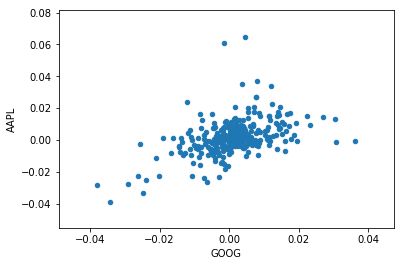

In [25]:
quotes.pct_change().plot(kind="scatter", x="GOOG", y="AAPL")

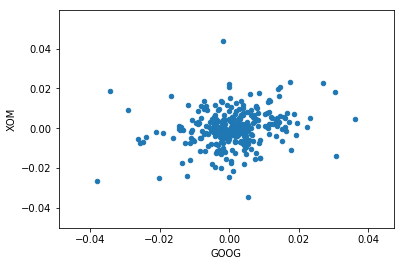

In [26]:
quotes.pct_change().plot(kind="scatter", x="GOOG", y="XOM")